# ЛР №2

Вариант 5
Студент: Геворкян Д.Ф.

## Первое задание.

Загрузить в среду одно из полноцветных изображений из предыдущей
лабораторной работы. Разделить полноцветное изображения на отдельные
каналы. Использовать встроенную функцию np.histogram для вычисления
гистограмм каждого цветового канала. В графическом окне отобразить:

− каждый цветовой канал в полутоновом цвете и его гистограмму;

− исходное полноцветное изображение и гистограмму цветного
изображения, на которой отображены все три гистограммы каждого цветового
канала. Кривым гистограммам придать цвет соответствующего им канала.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

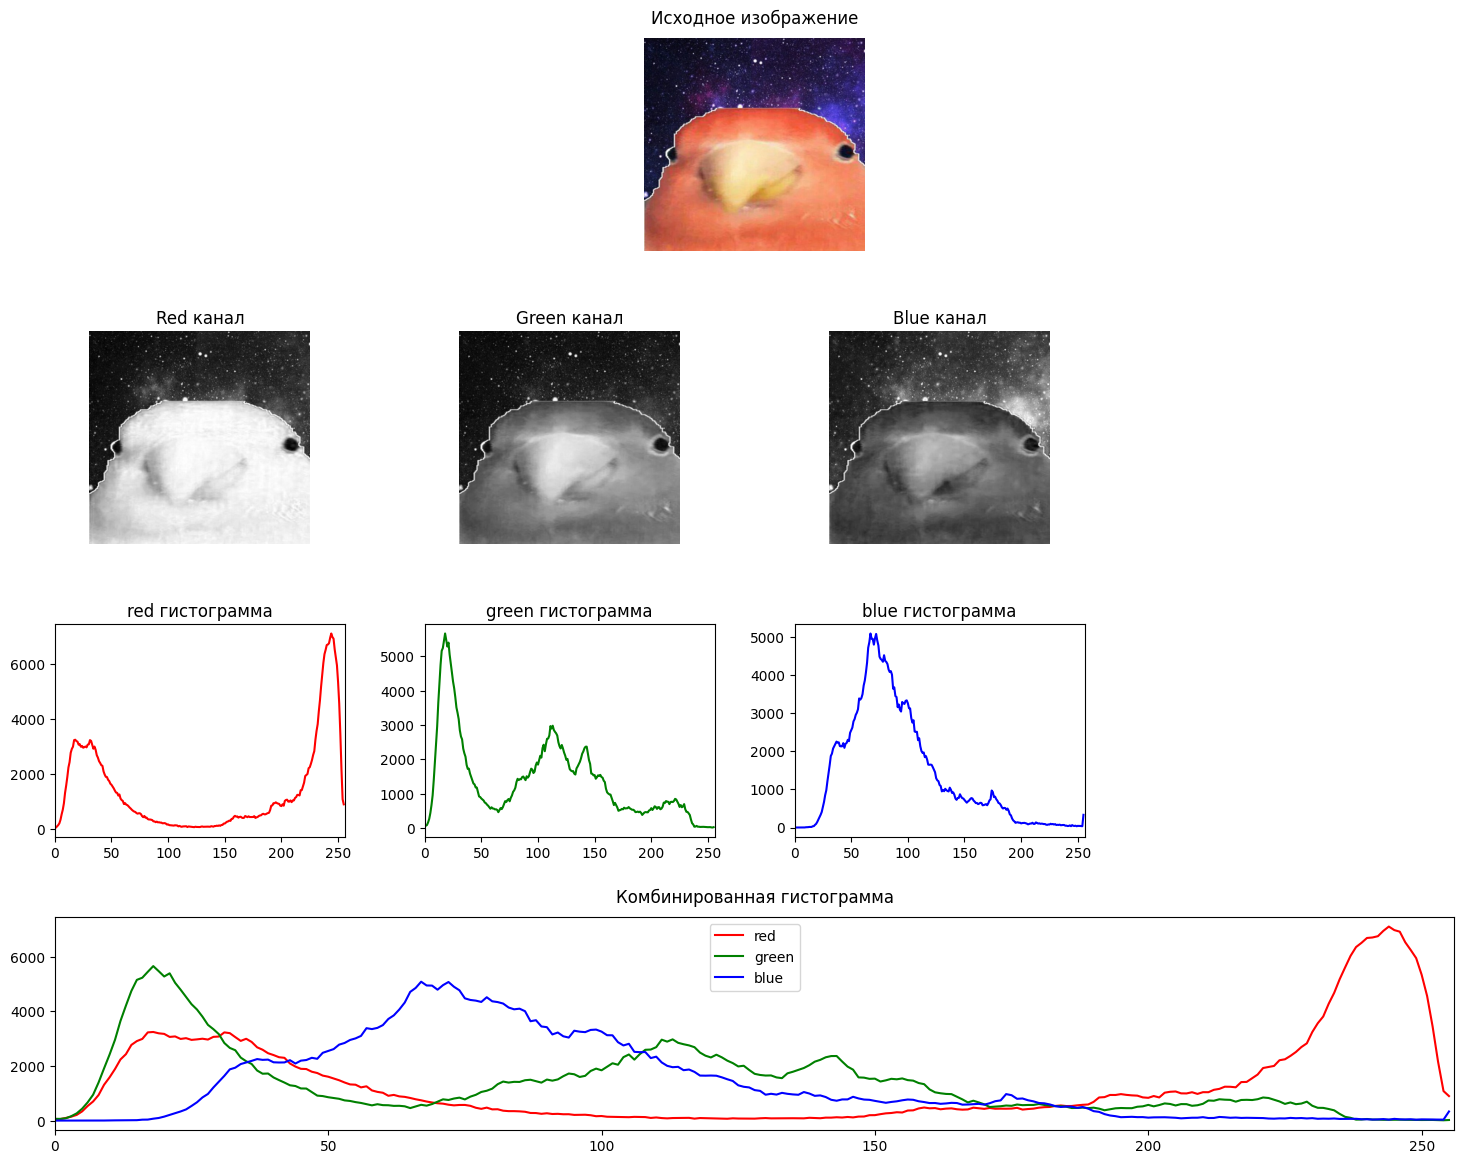

In [11]:
# Загрузка изображения
image = cv2.imread('pepuk.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Конвертация из BGR в RGB

# Разделение на каналы
channels = cv2.split(image)
colors = ('red', 'green', 'blue')
channel_names = ('Red канал', 'Green канал', 'Blue канал')

# Расположение для изображений/графиков
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(4, 4)

ax_original = fig.add_subplot(gs[0, 1:3])
ax_original.imshow(image)
ax_original.set_title('Исходное изображение', pad=10)
ax_original.axis('off')

# Отображение каналов и их гистограмм
for i, (channel, color, name) in enumerate(zip(channels, colors, channel_names)):
    # Полутоновое изображение канала
    ax_channel = fig.add_subplot(gs[1, i])
    ax_channel.imshow(channel, cmap='gray')
    ax_channel.set_title(name, pad=5)
    ax_channel.axis('off')

    # Гистограмма канала
    ax_hist = fig.add_subplot(gs[2, i])
    hist = np.histogram(channel, bins=256, range=(0, 256))[0]
    ax_hist.plot(hist, color=color)
    ax_hist.set_title(f'{color} гистограмма', pad=5)
    ax_hist.set_xlim([0, 256])

# Общая гистограмма всех каналов
ax_combined = fig.add_subplot(gs[3, :])  # Занимает всю нижнюю строку
for channel, color in zip(channels, colors):
    hist = np.histogram(channel, bins=256, range=(0, 256))[0]
    ax_combined.plot(hist, color=color, label=color)
ax_combined.set_title('Комбинированная гистограмма', pad=10)
ax_combined.set_xlim([0, 256])
ax_combined.legend()

plt.tight_layout(pad=2.0)
plt.show()

## Второе задание.
Выполнить бинаризацию полутонового изображения из пункта 3 с разными
значениями порогов яркости. Для этого задействовать встроенную функцию
cv2.threshold. Результат бинаризации изображения вывести в графическом окне.

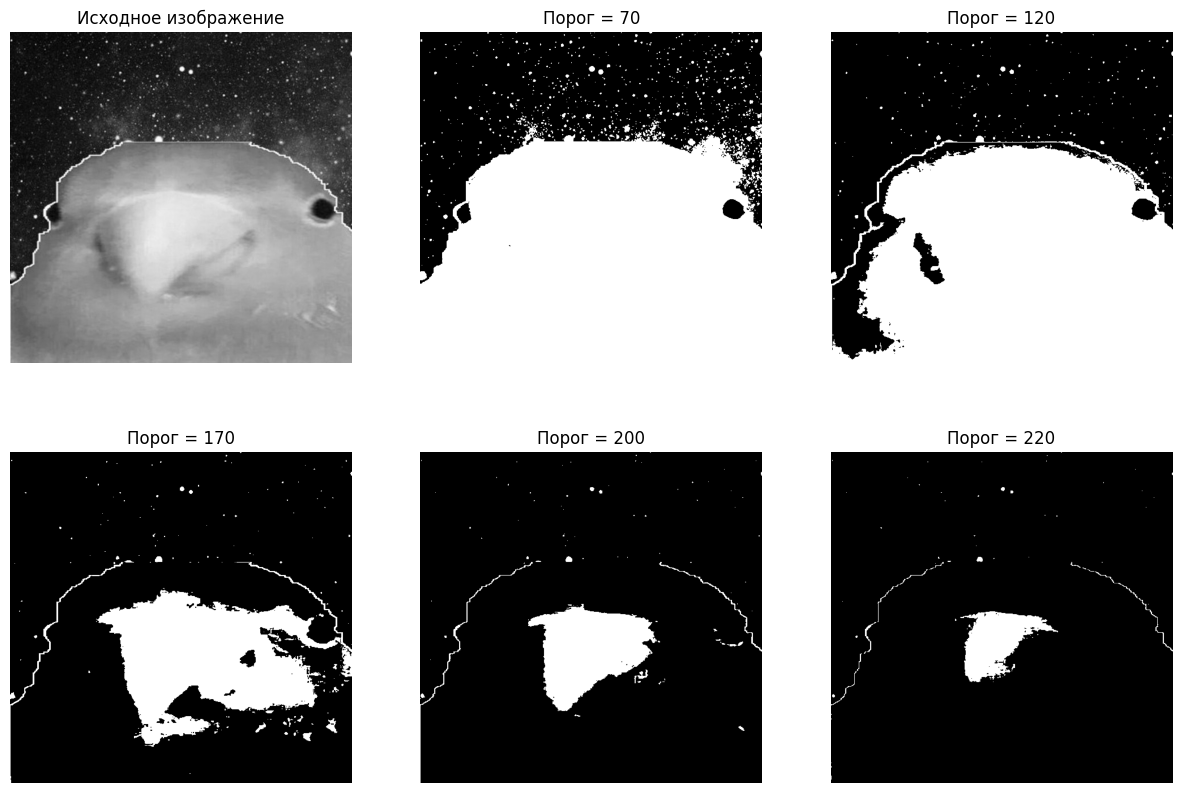

In [26]:
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения в оттенках серого
image = cv2.imread('pepuk.jpg', cv2.IMREAD_GRAYSCALE)

# Пороги для бинаризации
thresholds = [70, 120, 170, 200, 220]

# Создаем subplot для отображения результатов
plt.figure(figsize=(15, 10))

# Выводим исходное изображение
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Применяем бинаризацию для каждого порога
for i, thresh in enumerate(thresholds, 2):
    # Применяем пороговую бинаризацию (THRESH_BINARY)
    _, binary_img = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

    # Отображаем результат
    plt.subplot(2, 3, i)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Порог = {thresh}')
    plt.axis('off')


plt.show()

## Третье задание.
Выполнить, написав собственный алгоритм (функцию):

− вычисление и построение гистограммы полутонового изображения из
пункта 3. Результат работы алгоритма вывести в отдельном графическом окне;

− построение негатива изображения. Также необходимо вычислить и
построить гистограмму изображения. Результат работы алгоритма отобразить в
отдельном графическом окне;

− бинаризацию полутонового изображения по формуле (7). Выполнить
бинаризацию используя формулу с разными значениями порогов яркости. Все
полученные изображения отобразить в одном графическом окне;

− линейное преобразование диапазона яркостей по формуле (11).
Построить серию изображений с разными значениями 𝑥_min и 𝑥_𝑚𝑎𝑥. Подобрать
оптимальное преобразования. Все результаты отобразить в одном графическом
окне. Также напротив каждого изображения построить его гистограмму.


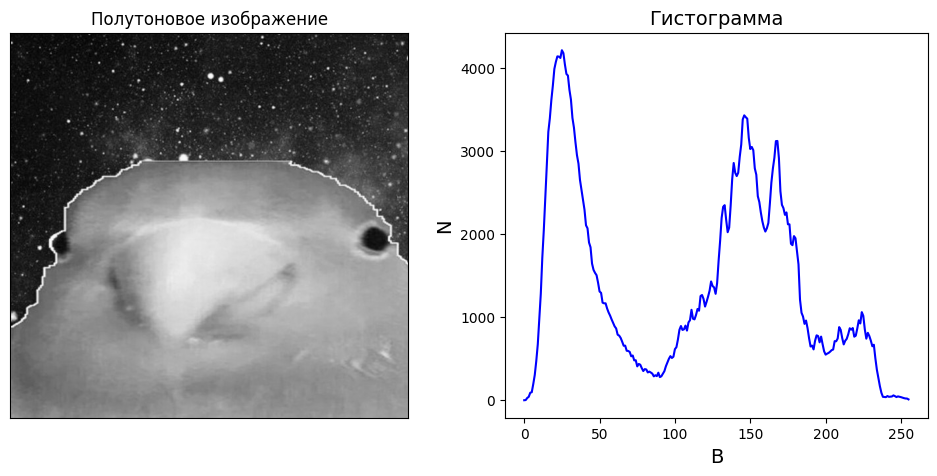

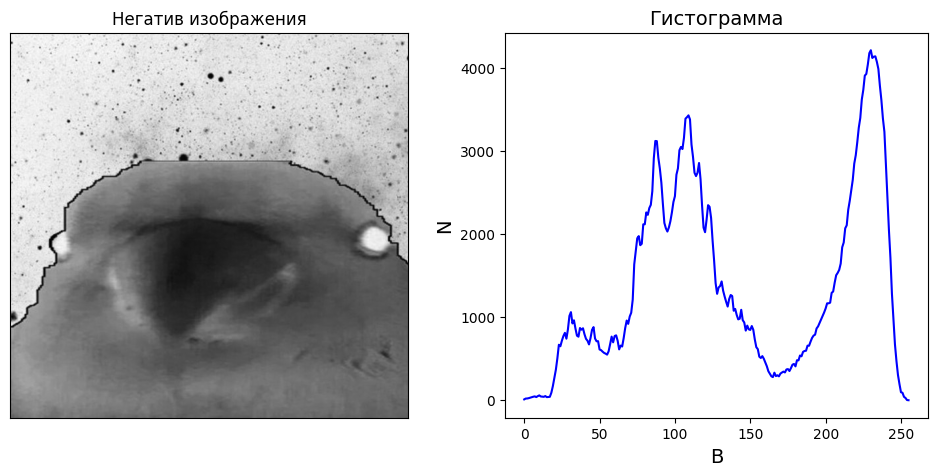

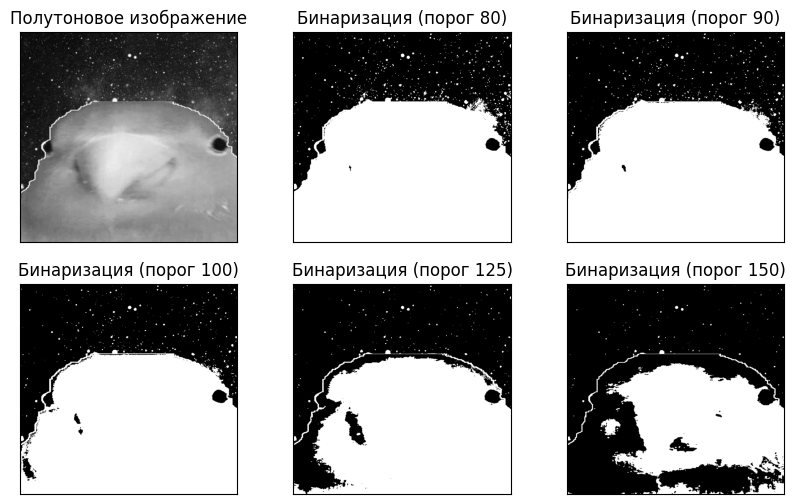

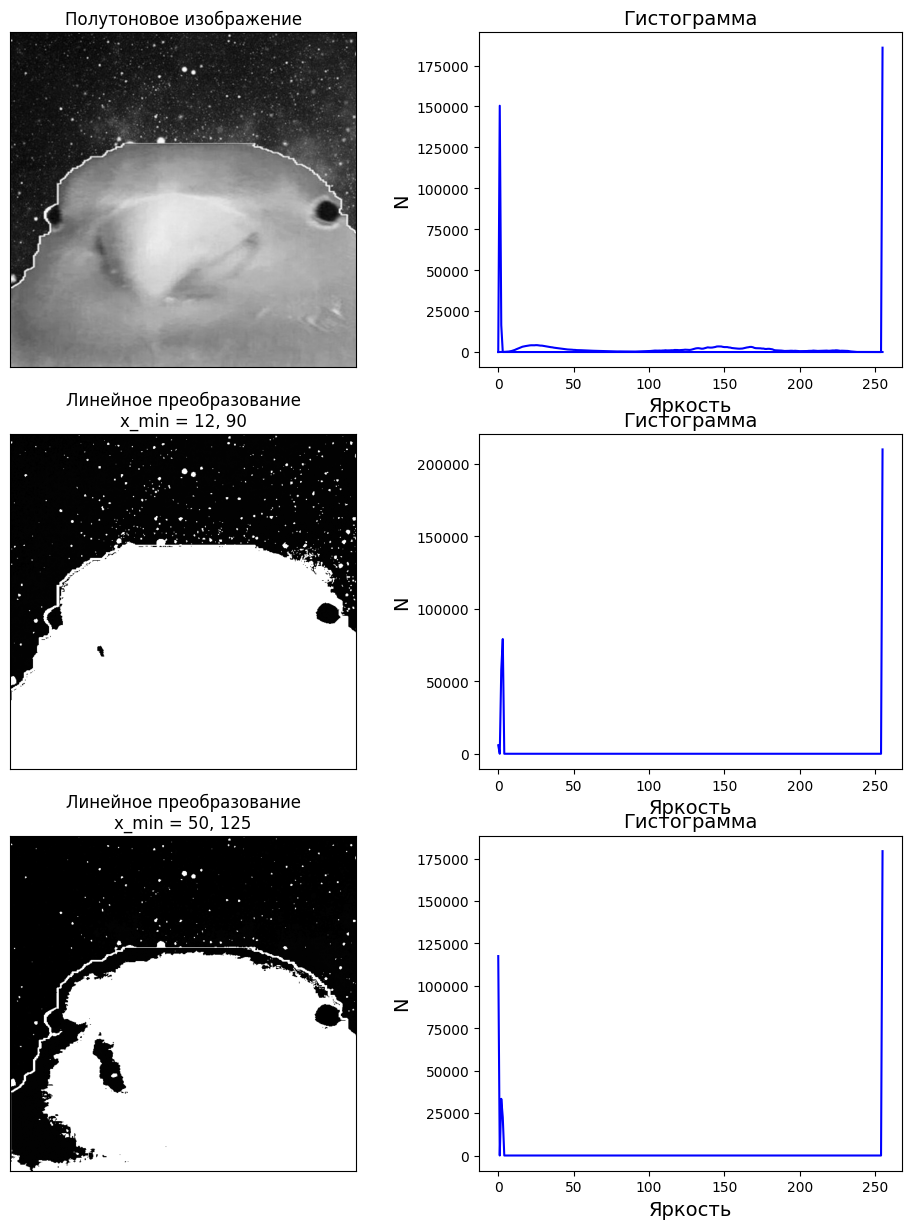

In [53]:
def plot_h(*hists, xlabel, ylabel, title):
    for i, h in enumerate(hists):
        if i % 2 == 0:
            plt.plot(h, hists[i+1])
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=14)


def plot_im(im, title, im_type):
    if im_type == "rgb":
        plt.imshow(im)
    elif im_type == "gray":
        plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.title(title, fontsize=12)
    plt.xticks([])
    plt.yticks([])


def hist(im, bins):
    height, width = im.shape[:2]
    res = np.zeros(bins)
    for i in range(height):
        for j in range(width):
            val = im[i, j]
            if val < bins:
                res[val] += 1
    return res


def neg(im):
    return 255 - im


def bin_threshold(im, threshold):
    return (im > threshold).astype(np.uint8) * 255


def linear_transform(im, x_min, x_max):
    res = np.zeros_like(im, dtype=np.uint8)
    mask = (im >= x_min) & (im <= x_max)
    res[mask] = 255 * (im[mask] - x_min) / (x_max - x_min)
    res[im > x_max] = 255
    return res


def main():
    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_im(im, 'Полутоновое изображение', 'gray')
    plt.subplot(122)
    plot_h(hist(im, 256), 'b', xlabel='B', ylabel='N', title='Гистограмма')
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_im(neg(im), 'Негатив изображения', 'gray')
    plt.subplot(122)
    plot_h(hist(neg(im), 256), 'b', xlabel='B', ylabel='N', title='Гистограмма')
    plt.show()

    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(10, 6))
    thresholds = [80, 90, 100, 125, 150]
    plt.subplot(231)
    plot_im(im, 'Полутоновое изображение', 'gray')
    for i, thresh in enumerate(thresholds, start=2):
        plt.subplot(2, 3, i)
        plot_im(bin_threshold(im, thresh), f'Бинаризация (порог {thresh})', 'gray')
    plt.show()

    im = cv2.cvtColor(cv2.imread("pepuk.jpg"), cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 20))
    transforms = [
        (0, 120, '0, 120'),
        (12, 90, '12, 90'),
        (50, 125, '50, 125')
    ]

    for i, (x_min, x_max, label) in enumerate(transforms, start=1):
        transformed = linear_transform(im, x_min, x_max)
        plt.subplot(4, 2, 2*i-1)
        plot_im(transformed, f'Линейное преобразование\nx_min = {label}', 'gray')
        plt.subplot(4, 2, 2*i)
        plot_h(hist(transformed, 256), 'b', xlabel='Яркость', ylabel='N', title='Гистограмма')

    plt.subplot(421)
    plot_im(im, 'Полутоновое изображение', 'gray')
    plt.subplot(422)
    plot_h(hist(im, 256), 'b', xlabel='Яркость', ylabel='N', title='Гистограмма')
    plt.show()

main()